# Ridge, Lasso and Elastic Net Regression

In this notebook we will check if either Ridge, Lasso or Elastic Net Regression is better to use. These Regression models can be used if the current model we use for example Multiple Linear Regression (MLR) is overfitting the data. By applying Rige, Lasso or Elastic Net Regression we add a little bit bias to our model which will create a more generalized model and will overcome the problem of overfitting. 

- **Ridge Regression (L2)**
    - Ridge regression uses L2 norm
    - The shrinkage penalty has the effect of shrinking the estimates of coefficinets towards 0
    - The tuning paramter lambda serves to control the relative impact of the penalty term on the regression coefficinet estimates
    - Selecting a good Lambda (alpha) value is critical; cross-validation is used to find the most suitable Lambda(alpha)
    - It is best to apply Ridge Regression after variable standardization
\


 
- **LASSO Regression (L1)**
    - Least Absolute Shrinkage and Selection Operator
    - LASSO Regression uses L1 norm
    - LASSO eliminates the least imporant features fromt he model, it automatically performs a type of feature selection
    - Selecting a good value for Lambda(alpha) we use cross-validation
    - It is best to apply LASSO Regression after variable standardization
\


- **Elastic Net Regression**
    - In Elastic Net Regression we may be able to get the bst of both worlds by making some feature coefficinets to zero while reducing the magnitude of other features
    - Combination of L1 Norm and L2 norm
    - Overall performs good on a large dataset with allot of features
    - Overall of the time works better than Ridge and Lasso Regression
    - Reduces Collinearity
    
- **Lambda(alpha)**
     - If lambda(alpha) = 0 you will get the Linear Regression model
     - If you increase Lambda(alpha) thecoefficients are shrinking. The higher the Lambda(alpha) closer the coefficient will get close to 0
     - Makes the model less complex    
    

**Cross Validation**: you dont woant the test set to leak into your train set. However you want to come up with a performance metric which is the estimate version of the performance metric in the test set.


**Feature selection Embedded Method for linear regression**
- Lasso, Ridge and Elastic Net Regression are part of the feature selection Embedded Method

**Skewed Data**
- In Linear Regrssion models if you have skewed features you should normalize them before applying the model

**Permornce Metrics**
- Mean Absolute Error(MAE): Magnitude of difference between the prediction of an observation and the true value of that obeservation
- Mean Squared Error (MSE): The average squared difference between predicted and true values of that observation
- Root Mean Squared Error (RMSE): The standard deviation of the residuals (prediction errors)
- R2 Square: The percentage of variation explained by the relationship between two variables


#### Import libraries

In [68]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

### Exploratory Data Analysis (EDA)

In [69]:
#Import data
USAhousing = pd.read_csv('USA_Housing.csv')

#check first 5 rows of the data
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


#### Check for null values

In [70]:
# Check for null values
USAhousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [71]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**No Null values Present in the features**

#### Statistical info of our dataset

In [72]:
# Check statistical information 
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [73]:
# check column names
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#### General plot of our dataset

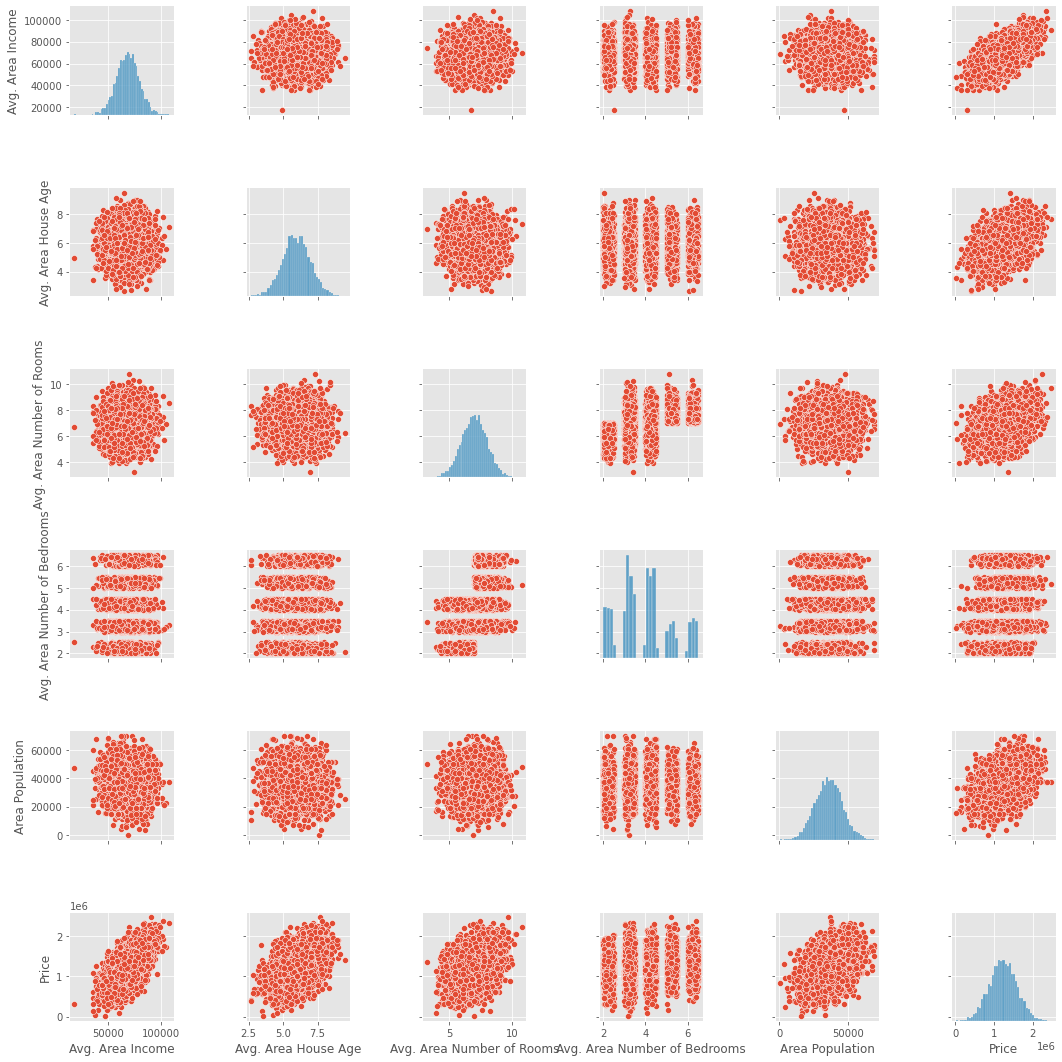

In [74]:
# Plot the data
sns.pairplot(USAhousing)

In [75]:
USAhousing.hvplot.hist(by='Price', subplots=False, width=1000)

:NdOverlay   [Element]
   :Histogram   [Area Population]   (Area Population_count)

In [76]:
USAhousing.hvplot.hist("Price")

:Histogram   [Price]   (Price_count)

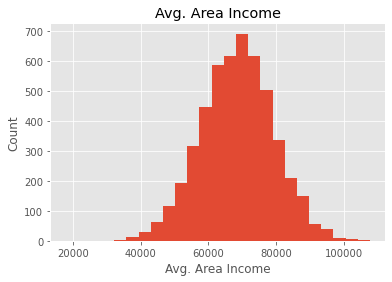

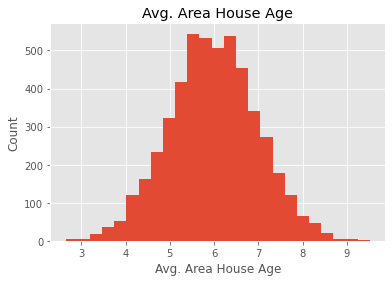

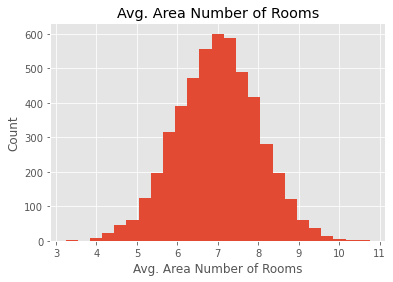

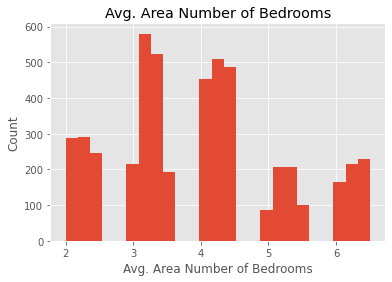

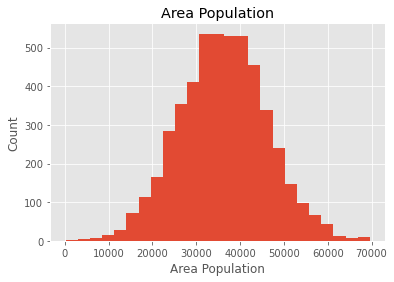

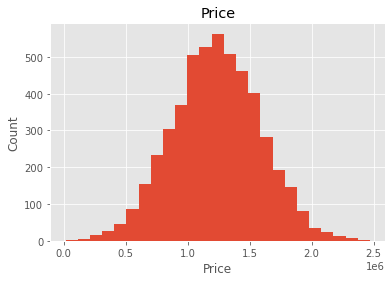

In [77]:
# Create a variable with column names
feature_names = USAhousing.drop(["Address"],axis=1).copy().columns

## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in feature_names:
    data=USAhousing.drop(["Address"],axis=1).copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


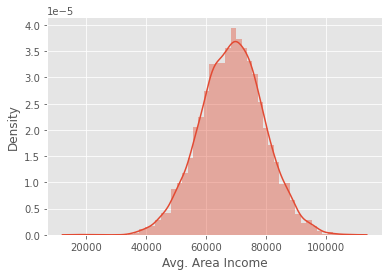

In [78]:
sns.distplot(USAhousing['Avg. Area Income'])

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


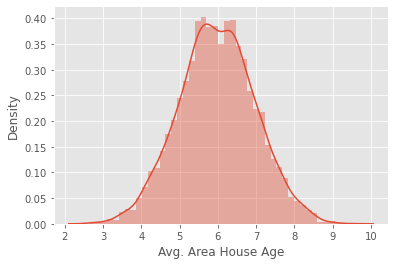

In [79]:
sns.distplot(USAhousing['Avg. Area House Age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AFA2BA9C40>,
      dtype=object)

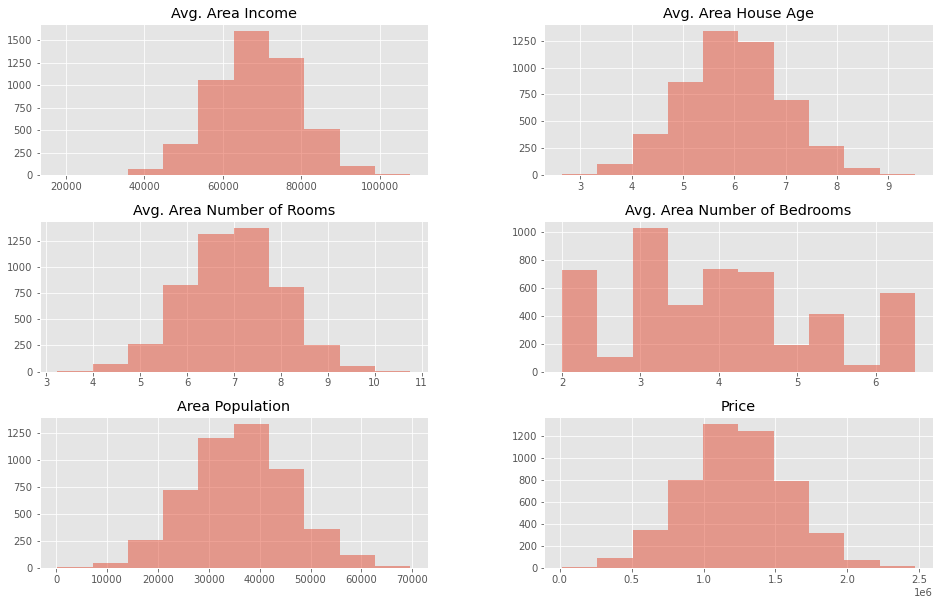

In [80]:
from scipy.stats import skew
df = USAhousing.drop(["Address"],axis=1).copy()

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.style.use('ggplot')

df = df

df.hist(alpha=0.5, figsize=(16, 10))

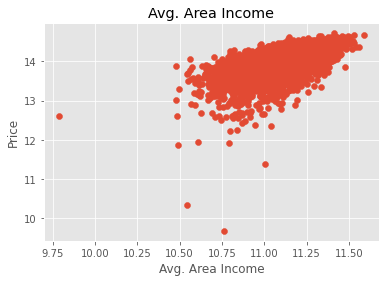

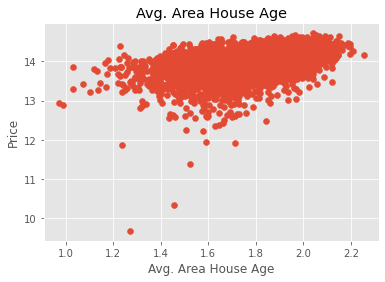

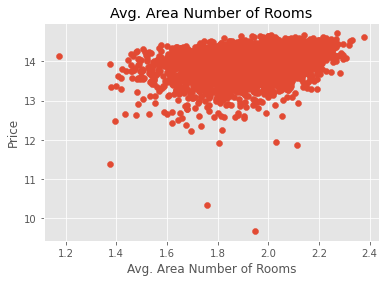

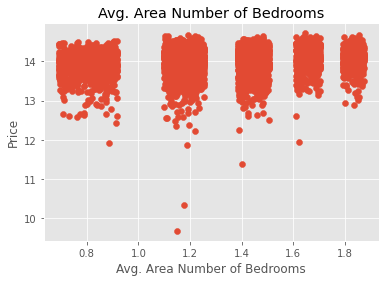

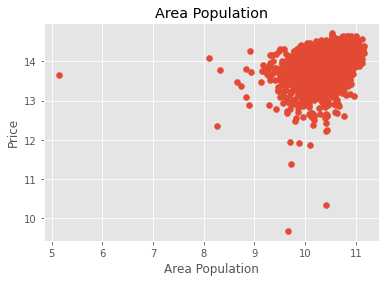

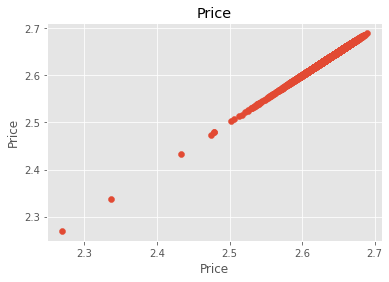

In [81]:
# Scatterplot
for feature in feature_names:
    data=USAhousing.drop(["Address"],axis=1).copy().copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

In [82]:
USAhousing.hvplot.scatter(x='Avg. Area House Age', y='Price')

:Scatter   [Avg. Area House Age]   (Price)

In [83]:
USAhousing.hvplot.scatter(x='Avg. Area Income', y='Price')

:Scatter   [Avg. Area Income]   (Price)

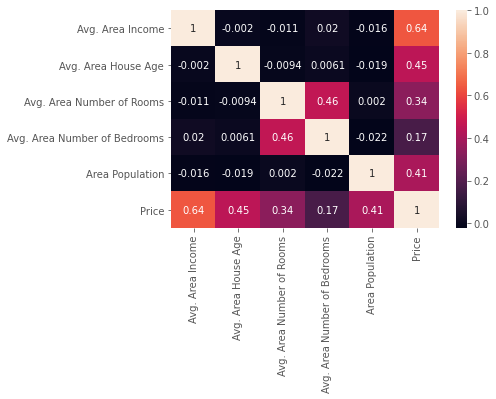

In [84]:
sns.heatmap(USAhousing.corr(), annot=True)

# Standardize our dataset

For machine learning models where gradient descent is used we should always standardize our dataset

**StandardScalar: subtract the average and divide it by standard deviation**

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = USAhousing.drop(['Address'], axis=1)
df_sc = scaler.fit_transform(df_sc)
df_sc

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867,
        -0.49008146],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945,
         0.77550829],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989,
        -0.49021053],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658,
        -0.570244  ],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608,
        -0.0946402 ],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464,
         0.18941143]])

In [93]:
# Convet standarlized df into a dataframe
USAhousing.drop(['Address'], axis=1).columns
df_sc = pd.DataFrame(df_sc, columns=USAhousing.drop(['Address'], axis=1).columns)
df_sc.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518


# training a Linear Rgerssion Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### Split our data into X=containing all our independent features and y=our dependent feature

In [94]:
# Independent features
X = df_sc.drop(['Price'], axis=1)

#dependent feature
y = df_sc.iloc[:,-1].values
#y = df_sc['Price']

### Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # we split our data into 70% train data and 30% test data

In [96]:
# X_train contains 70% of the dataset
print(X_train.shape)
# X_test contains 70% of the dataset
print(X_test.shape)
# USAhousing contains 100% of the dataset
print(USAhousing.shape)

(3500, 5)
(1500, 5)
(5000, 7)


In [97]:
### Create a function where we store our performance metrics in
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Preparing Data for Linear Regression

Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

Try different preparations of your data using these heuristics and see what works best for your problem.

- **Linear Assumption**. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- **Remove Noise**. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
- **Remove Collinearity**. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
- **Gaussian Distributions**. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
- **Rescale Inputs**: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

## Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

#### Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [99]:
# print the intercept
print(lin_reg.intercept_)

-0.0022488163278688612


In [100]:
# store the coefficients into a dataframe
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,0.652722
Avg. Area House Age,0.464932
Avg. Area Number of Rooms,0.341322
Avg. Area Number of Bedrooms,0.008252
Area Population,0.427717


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $232679.724643

- Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of $163841.046593

- Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $121110.555478

- Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $2892.815119

- Holding all other features fixed, a 1 unit increase in Area Population is associated with an increase of $151252.342377 

#### Predictions from our model

In [101]:
pred = lin_reg.predict(X_test)

In [102]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

**Residual Histrogram**

In [103]:
pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

In [104]:
# Make predictions based on X_test dataset
pred = lin_reg.predict(X_test)
diff = y_test - pred

In [105]:
#Convert the values into a dataframe called res_df
res_df=pd.concat([pd.Series(y_test),pd.Series(pred),pd.Series(diff)],axis=1)
res_df.columns=['Actual Values','Predicted values',"Diff"]
res_df

,Actual Values,Predicted values,Diff
0,0.303112,0.216560,0.086552
1,0.055855,0.014303,0.041552
2,0.305941,0.033315,0.272626
3,0.564840,-0.008018,0.572858
4,-0.537266,-0.489178,-0.048088
...,...,...,...
1495,0.328958,0.581315,-0.252358
1496,0.220529,-0.388324,0.608853
1497,0.682035,0.637379,0.044657
1498,0.503252,0.711892,-0.208639


We can see fromt he above dataset that the Diff is relatively small which means the model is predicting good

In [106]:
# Puts the coefficients from the models into dataframe
coefficients = pd.DataFrame({'Features':df_sc.drop('Price', axis=1, inplace=False).columns})
coefficients['lin_reg']= lin_reg.coef_

In [107]:
coefficients

,Features,lin_reg
0,Avg. Area Income,0.652722
1,Avg. Area House Age,0.464932
2,Avg. Area Number of Rooms,0.341322
3,Avg. Area Number of Bedrooms,0.008252
4,Area Population,0.427717


In [108]:
# Performance metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.22979221301655217
MSE: 0.0807624541925124
RMSE: 0.28418735755221836
R2 Square 0.9146818498754016
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.2307691343338449
MSE: 0.08251608907365471
RMSE: 0.28725613844381936
R2 Square 0.9192986579075526
__________________________________


AS we can see from aobe the R2 Square on the train data is higher then our test data which means our model is performing well and less chance for overfitting. 91% of our independent features predicts our dependen feature

In [109]:
# Puts the performance metrics in dataframe
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.229792,0.080762,0.284187,0.914682,0.917379


# Ridge regression

> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

> Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

> $\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

> Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.
***

In [110]:
# import libaries used from Cross Validation
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [111]:
# Using the RidgeCV method from sklearn to find the best alpha to be used for the model
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_
alpha_ridge_opt = ridgecv.alpha_

In [112]:
# applyng the model on the data

model = Ridge(alpha=alpha_ridge_opt, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [113]:
# Make predictions based on X_test dataset

pred = pred = model.predict(X_test)
diff = y_test - pred

In [114]:
#Convert the values into a dataframe called res_df
res_df=pd.concat([pd.Series(y_test),pd.Series(pred),pd.Series(diff)],axis=1)
res_df.columns=['Actual Values','Predicted values',"Diff"]
res_df

,Actual Values,Predicted values,Diff
0,0.303112,0.216551,0.086561
1,0.055855,0.014298,0.041558
2,0.305941,0.033305,0.272636
3,0.564840,-0.008019,0.572859
4,-0.537266,-0.489171,-0.048095
...,...,...,...
1495,0.328958,0.581290,-0.252333
1496,0.220529,-0.388313,0.608842
1497,0.682035,0.637355,0.044681
1498,0.503252,0.711872,-0.208620


Ridge regression is also performing well as the diff is not that huge

In [115]:
# adding coefficients of ridge regression to our coefficinets dataframe
coefficients['model_ridge']= model.coef_

In [116]:
coefficients

,Features,lin_reg,model_ridge
0,Avg. Area Income,0.652722,0.652703
1,Avg. Area House Age,0.464932,0.464918
2,Avg. Area Number of Rooms,0.341322,0.341309
3,Avg. Area Number of Bedrooms,0.008252,0.008258
4,Area Population,0.427717,0.427705


In [117]:
# Evaluation metrics

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.22979227353897758
MSE: 0.08076241356523711
RMSE: 0.2841872860724721
R2 Square 0.914681892794404
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.23076957084518945
MSE: 0.0825160898767325
RMSE: 0.28725613984166204
R2 Square 0.9192986571221365
__________________________________


AS we can see from aobe the R2 Square on the train data is higher then our test data which means our model is performing well and less chance for overfitting. 91% of our independent features predicts our dependen feature

In [118]:
# appending the metrics to the dataframe
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.229792,0.080762,0.284187,0.914682,0.917379
1,Ridge Regression,0.229792,0.080762,0.284187,0.914682,0.917379


# LASSO Regression

> A linear model that estimates sparse coefficients.

> Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

> The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.
***


In [119]:
# Using the RidgeCV method from sklearn to find the best alpha to be used for the model
# to calculate to optimal alpha we will use Cross Validation (CV)
lassocv =LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_
alpha_lasso_opt = lassocv.alpha_

In [120]:
# applyng the model on the data
from sklearn.linear_model import Lasso

model = Lasso(alpha=alpha_lasso_opt, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [121]:
# Make predictions based on X_test dataset

pred = pred = model.predict(X_test)
diff = y_test - pred

In [122]:
#Convert the values into a dataframe called res_df
res_df=pd.concat([pd.Series(y_test),pd.Series(pred),pd.Series(diff)],axis=1)
res_df.columns=['Actual Values','Predicted values',"Diff"]
res_df

,Actual Values,Predicted values,Diff
0,0.303112,0.216236,0.086876
1,0.055855,0.014190,0.041666
2,0.305941,0.033978,0.271962
3,0.564840,-0.008009,0.572849
4,-0.537266,-0.487991,-0.049275
...,...,...,...
1495,0.328958,0.580914,-0.251956
1496,0.220529,-0.387724,0.608253
1497,0.682035,0.636463,0.045573
1498,0.503252,0.710205,-0.206953


In [123]:
# adding coefficients of ridge regression to our coefficinets dataframe
coefficients['lasso']= model.coef_

In [124]:
coefficients

,Features,lin_reg,model_ridge,lasso
0,Avg. Area Income,0.652722,0.652703,0.652076
1,Avg. Area House Age,0.464932,0.464918,0.464269
2,Avg. Area Number of Rooms,0.341322,0.341309,0.340851
3,Avg. Area Number of Bedrooms,0.008252,0.008258,0.007837
4,Area Population,0.427717,0.427705,0.427042


In [125]:
# Evaluation metrics

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.2297915502554744
MSE: 0.08075672284826206
RMSE: 0.2841772736308484
R2 Square 0.9146879045166834
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.2307787769280748
MSE: 0.08251797257033208
RMSE: 0.287259416852315
R2 Square 0.9192968158339473
__________________________________


AS we can see from bove the R2 Square on the train data is higher then our test data which means our model is performing well and less chance for overfitting. 91% of our independent features predicts our dependen feature

In [126]:
# appending the metrics to the dataframe
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.229792,0.080762,0.284187,0.914682,0.917379
1,Ridge Regression,0.229792,0.080762,0.284187,0.914682,0.917379
2,Lasso Regression,0.229792,0.080757,0.284177,0.914688,-0.003223


# Elastic Net

> A linear regression model trained with L1 and L2 prior as regularizer. 

> This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

> Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

> A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

> The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$
***

In [127]:
# Using the RidgeCV method from sklearn to find the best alpha to be used for the model
# to calculate to optimal alpha we will use Cross Validation (CV)

In [128]:
# to calculate to optimal alpha we will use Cross Validation (CV)
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_
alpha_elasticnet_opt = elasticnetcv.alpha_

In [129]:
# applyng the model on the data
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=alpha_elasticnet_opt, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [130]:
# Make predictions based on X_test dataset

pred = pred = model.predict(X_test)
diff = y_test - pred

In [131]:
#Convert the values into a dataframe called res_df
res_df=pd.concat([pd.Series(y_test),pd.Series(pred),pd.Series(diff)],axis=1)
res_df.columns=['Actual Values','Predicted values',"Diff"]
res_df

,Actual Values,Predicted values,Diff
0,0.303112,0.215944,0.087168
1,0.055855,0.014088,0.041768
2,0.305941,0.034486,0.271455
3,0.564840,-0.008002,0.572842
4,-0.537266,-0.487002,-0.050264
...,...,...,...
1495,0.328958,0.580500,-0.251542
1496,0.220529,-0.387193,0.607722
1497,0.682035,0.635634,0.046401
1498,0.503252,0.708764,-0.205511


In [132]:
# adding coefficients of ridge regression to our coefficinets dataframe
coefficients['ElasticNet']= model.coef_

In [133]:
coefficients

,Features,lin_reg,model_ridge,lasso,ElasticNet
0,Avg. Area Income,0.652722,0.652703,0.652076,0.651475
1,Avg. Area House Age,0.464932,0.464918,0.464269,0.463680
2,Avg. Area Number of Rooms,0.341322,0.341309,0.340851,0.340423
3,Avg. Area Number of Bedrooms,0.008252,0.008258,0.007837,0.007519
4,Area Population,0.427717,0.427705,0.427042,0.426445


In [134]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.22979952446631027
MSE: 0.08075480342045323
RMSE: 0.2841738964445067
R2 Square 0.9146899322167029
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.23079193125033165
MSE: 0.08252277593878186
RMSE: 0.28726777741121934
R2 Square 0.9192921181042705
__________________________________


# compare the differnt Regression Models (Ridge, Lasso and Elastig Net Regression)

In [142]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,MAE,MSE,RMSE,R2 Square,Cross Validation,Model
0,0.229792,0.080762,0.284187,0.914682,0.917379,NaN
1,0.229792,0.080762,0.284187,0.914682,0.917379,NaN
2,0.229792,0.080757,0.284177,0.914688,-0.003223,NaN
3,0.229800,0.080755,0.284174,0.914690,0.107243,NaN
4,0.229800,0.080755,0.284174,0.914690,0.107243,NaN
5,0.229800,0.080755,0.284174,0.914690,0.107243,Elastic Net Regression


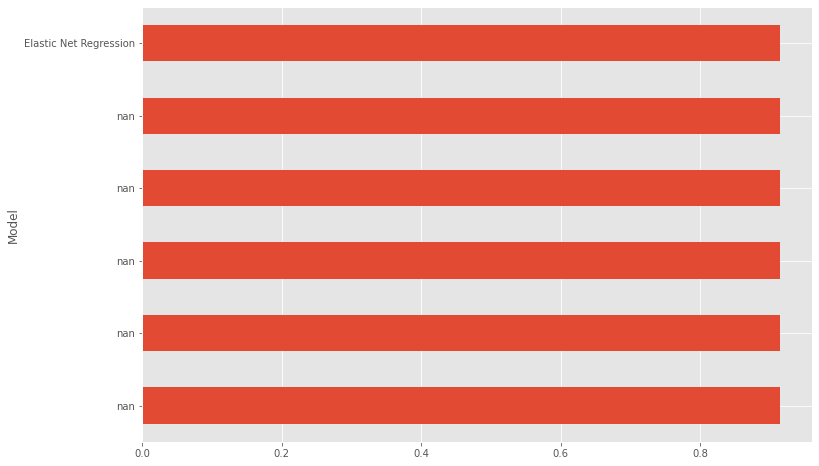

In [143]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

**We can see that Elastic Net Regression has the best R2 Square value and therefore the best model to use for our dataset** 

In [144]:
coefficients

,Features,lin_reg,model_ridge,lasso,ElasticNet
0,Avg. Area Income,0.652722,0.652703,0.652076,0.651475
1,Avg. Area House Age,0.464932,0.464918,0.464269,0.463680
2,Avg. Area Number of Rooms,0.341322,0.341309,0.340851,0.340423
3,Avg. Area Number of Bedrooms,0.008252,0.008258,0.007837,0.007519
4,Area Population,0.427717,0.427705,0.427042,0.426445


**We cam see that the coefficient for features are the smallest in ElasticNet regression**